In [1]:
import pandas as pd
import numpy as np
import csv as csv
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

addpoly = True
plot_lc = 0   # 1--display learning curve/ 0 -- don't display

In [2]:
#loading the data sets from the csv files

df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

print('train dataset: %s, test dataset %s' %(str(df_train.shape), str(df_test.shape)) )
df_train.head(10)

train dataset: (891, 12), test dataset (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df = df_train.append(df_test , ignore_index = True)

/home/dan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [5]:
# some quick inspections
print(df_train.shape, df_test.shape, df_train.columns.values)

(891, 12) (418, 11) ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
#Data Preprocessing
#Let's look at individual features one by one. Missing values will have to be filled.
#Categorical features need to be transformed to numerical values.


#Pclass
# check if there is any NAN
df['Pclass'].isnull().sum(axis=0)

0

In [7]:
# inspect the correlation between Pclass and Survived
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
#We can see that a higher class (lower value) has a higher survival rate. This should be a very useful feature.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
#Name

df.Name.head(10)
#Each name has a title, which is clearly what matters since it contains information of gender or status.

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [9]:
# extracting the titles from the names.
df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
Mme               1
Dona              1
Capt              1
the Countess      1
Don               1
Lady              1
Sir               1
Name: Title, dtype: int64

In [10]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') 
             & (df.Title !=  'Mrs')] = 'Others'

# inspect the correlation between Title and Survived
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

/home/dan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [11]:
# inspect the amount of people for each title
df['Title'].value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [12]:
#Eliminate name field
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr,0,0,1,0,0
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs,0,0,0,1,0
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,1,0,0,0
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,Mrs,0,0,0,1,0
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,373450,Mr,0,0,1,0,0


In [13]:
#sex

# check if there is any NAN
df.Sex.isnull().sum(axis=0)

0

In [14]:
# inspect the correlation between Sex and Survived
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# map the two genders to 0 and 1
df.Sex = df.Sex.map({'male':0, 'female':1})
df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others
0,22.0,NaN,S,7.2500,0,1,3,0,1,0.0,A/5 21171,Mr,0,0,1,0,0
1,38.0,C85,C,71.2833,0,2,1,1,1,1.0,PC 17599,Mrs,0,0,0,1,0
2,26.0,NaN,S,7.9250,0,3,3,1,0,1.0,STON/O2. 3101282,Miss,0,1,0,0,0
3,35.0,C123,S,53.1000,0,4,1,1,1,1.0,113803,Mrs,0,0,0,1,0
4,35.0,NaN,S,8.0500,0,5,3,0,0,0.0,373450,Mr,0,0,1,0,0


In [16]:
#Age

# check if there is any NAN
df.Age.isnull().sum(axis=0)

263

In [17]:
#SibSp and Parch

# check if there is any NAN
df.SibSp.isnull().sum(axis=0), df.Parch.isnull().sum(axis=0)

(0, 0)

In [18]:
# create a new feature "Family"
df['Family'] = df['SibSp'] + df['Parch'] + 1

# inspect the correlation between Family and Survived
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [19]:
df.Family = df.Family.map(lambda x: 0 if x > 4 else x)
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.161290
1,1,0.303538
2,2,0.552795
3,3,0.578431
4,4,0.724138


In [20]:
df['Family'].value_counts()

1    790
2    235
3    159
0     82
4     43
Name: Family, dtype: int64

In [21]:
# Ticket

# check if there is any NAN
df.Ticket.isnull().sum(axis=0)

0

In [22]:
df.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

It looks like there are two types of tickets: (1) number (2) letters + number

Ticket names with letters probably represent some special classes. For the numbers, the majority of tickets have their first digit = 1, 2, or 3, which probably also represent different classes. So I just keep the first element (a letter or a single-digit number) of these ticket names


In [23]:
df.Ticket = df.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [24]:
# inspect the amount of people for each type of tickets
df['Ticket'].value_counts()

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
8      2
9      2
Name: Ticket, dtype: int64

We can see that the majority of tickets are indeed "3", "2", and "1", and their corresponding survival rates are "1" > "2" > "3". For the others, the survival rate is low except for "9","C","F","P", and "S". However, "9" and "F" are very small sample. The correlation we see here probably comes from Pclass or Fare, so let's check.

In [25]:
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,65.771211
1,2,20.235194
2,3,15.380682
3,4,16.764036
4,5,19.262500
5,6,19.153711
6,7,9.197438
7,8,8.397900
8,9,7.750000
9,A,10.189681


In [26]:
df[['Ticket', 'Pclass']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Pclass
0,1,1.147619
1,2,2.309353
2,3,2.904429
3,4,3.000000
4,5,2.333333
5,6,2.111111
6,7,3.000000
7,8,3.000000
8,9,3.000000
9,A,3.000000


Indeed, there is some relation between Ticket and Fare, or between Ticket and Pclass. Also, one interesting thing is that "P" corresponds to very high Fare and Pcalss (better than "1"). This is an additional information that cannot be seen in other features. So keeping Ticket as a feature might be useful.

I'll come back to Ticket later. I don't further transform it now because its current form might be useful for guessing some missing values in other features.

In [27]:
#Fare



# check if there is any NAN
df.Fare.isnull().sum(axis=0)

1

Only one missing value. Fare can probably be inferred from Ticket, Pclass, Cabin and Embarked. Let's see the corresponding values of for these features.

In [28]:
df.Ticket[df.Fare.isnull()]

1043    3
Name: Ticket, dtype: object

In [29]:
df.Pclass[df.Fare.isnull()]

1043    3
Name: Pclass, dtype: int64

In [30]:
df.Cabin[df.Fare.isnull()]

1043    NaN
Name: Cabin, dtype: object

In [31]:
df.Embarked[df.Fare.isnull()]

1043    S
Name: Embarked, dtype: object

There is no corresponding value for Cabin, so let's look at the relation between Fare and the three features.

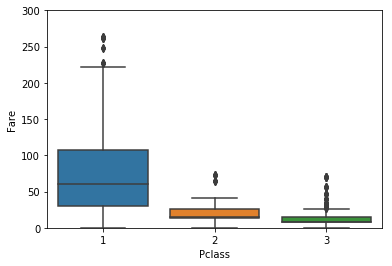

In [32]:
# use boxplot to visualize the distribution of Fare for each Pclass
sns.boxplot('Pclass','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [33]:
# inspect the correlation between Pclass and Fare
df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [34]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Pclass
df[['Pclass', 'Fare']].groupby(['Pclass']).std() / df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,0.919302
2,0.642476
3,0.864050


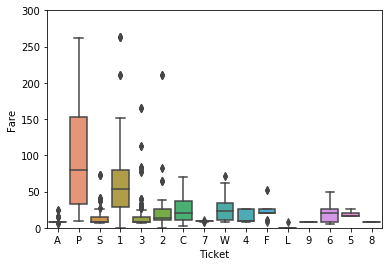

In [35]:
# use boxplot to visualize the distribution of Fare for each Ticket
sns.boxplot('Ticket','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [36]:
# inspect the correlation between Ticket and Fare 
# (we saw this earlier)
df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,65.771211
2,20.235194
3,15.380682
4,16.764036
5,19.262500
6,19.153711
7,9.197438
8,8.397900
9,7.750000


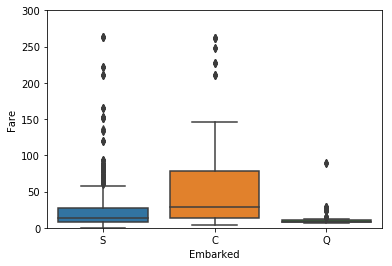

In [37]:
# use boxplot to visualize the distribution of Fare for each Embarked
sns.boxplot('Embarked','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [38]:
# inspect the correlation between Embarked and Fare
df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.418824


In [39]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Embarked
df[['Embarked', 'Fare']].groupby(['Embarked']).std() /  df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,1.350514
Q,1.097278
S,1.352954


Looks like Fare indeed has correlation with these three features. I'll guess the missing value using the median value of (Pcalss = 3) & (Ticket = 3) & (Embarked = S)

In [40]:
guess_Fare = df.Fare.loc[ (df.Ticket == '3') & (df.Pclass == 3) & (df.Embarked == 'S')].median()
df.Fare.fillna(guess_Fare , inplace=True)

# inspect the mean Fare values for people who died and survived
df[['Fare', 'Survived']].groupby(['Survived'],as_index=False).mean()

,Survived,Fare
0,0.0,22.117887
1,1.0,48.395408


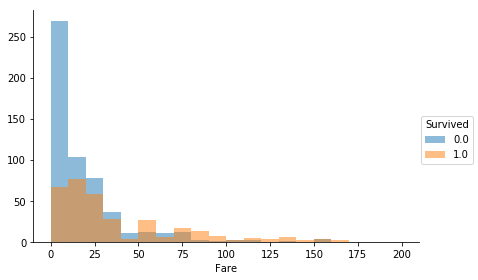

In [41]:
# visualize the distribution of Fare for people who survived and died
grid = sns.FacetGrid(df, hue='Survived', size=4, aspect=1.5)
grid.map(plt.hist, 'Fare', alpha=.5, bins=range(0,210,10))
grid.add_legend()
plt.show()

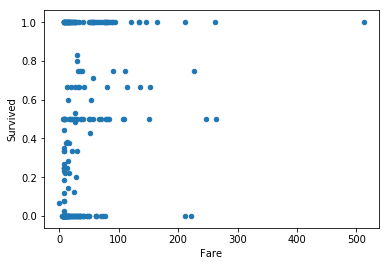

In [42]:
# visualize the correlation between Fare and Survived using a scatter plot
df[['Fare', 'Survived']].groupby(['Fare'],as_index=False).mean().plot.scatter('Fare','Survived')
plt.show()

We can see that people with lower Fare are less likely to survive. But this is certainly not a smooth curve if we don't bin the data. It would be better to feed machine learning algorithms with intervals of Fare, because using the original Fare values would likely cause over-fitting.

In [43]:
# bin Fare into five intervals with equal amount of people
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

# inspect the correlation between Fare-bin and Survived
df[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


Now the correlation is clear after binning the data!

In [44]:
#Cabin

# check if there is any NAN
df.Cabin.isnull().sum(axis=0)

1014

This is highly incomplete. We have two choices: (1) map the missing ones to a new cabin category "unknown" (2) just drop this feature. I have tried both and I decided to choose (2)

In [45]:
df = df.drop(labels=['Cabin'], axis=1)

In [46]:
# Embarked

# check if there is any NAN
df.Embarked.isnull().sum(axis=0)

2

In [47]:
df.describe(include=['O']) # S is the most common

,Embarked,Ticket,Title
count,1307,1309,1309
unique,3,16,5
top,S,3,Mr
freq,914,429,757


In [48]:
# fill the NAN
df.Embarked.fillna('S' , inplace=True )

In [49]:
# inspect the correlation between Embarked and Survived as well as some other features
df[['Embarked', 'Survived','Pclass','Fare', 'Age', 'Sex']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived,Pclass,Fare,Age,Sex
0,C,0.553571,1.851852,62.336267,32.332170,0.418519
1,Q,0.389610,2.894309,12.409012,28.630000,0.487805
2,S,0.339009,2.344978,27.512485,29.298151,0.319869


The survival rate does change between different Embarked values. However, it is due to the changes of other features. For example, people from Embarked = C are more likely to survive because they are generally richer (Pclass, Fare). People from Embarked = S has the lowest survival rate because it has the lowest fraction of female passengers, even though they are a bit richer than people from Embarked = Q.

I therefore decided to drop this feature as well.

In [50]:
df = df.drop(labels='Embarked', axis=1)

Now we can go back to Age and try to fill the missing values. Let's see how it relates to other features

In [51]:
#Age

# check if there is any NAN
df.Age.isnull().sum(axis=0)

263

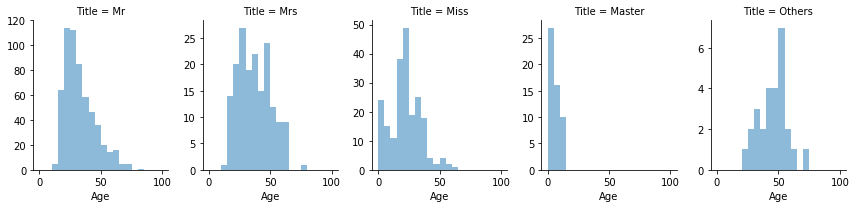

In [52]:
# visualize the correlation between Title and Age
grid = sns.FacetGrid(df, col='Title', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [53]:
# inspect the mean Age for each Title
df[['Title', 'Age']].groupby(['Title']).mean()

,Age
Title,
Master,5.482642
Miss,21.795236
Mr,32.252151
Mrs,36.930636
Others,45.074074


In [54]:
# inspect the standard deviation of Age for each Title
df[['Title', 'Age']].groupby(['Title']).std()

,Age
Title,
Master,4.161554
Miss,12.192794
Mr,12.422089
Mrs,12.872625
Others,11.303253


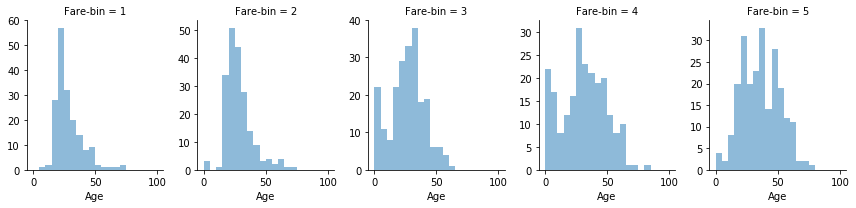

In [55]:
# visualize the correlation between Fare-bin and Age
grid = sns.FacetGrid(df, col='Fare-bin', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [56]:
# inspect the mean Age for each Fare-bin
df[['Fare-bin', 'Age']].groupby(['Fare-bin']).mean()

,Age
Fare-bin,
1,27.848315
2,27.898241
3,26.144009
4,30.728604
5,35.877913


In [57]:
# inspect the standard deviation of Age for each Fare-bin
df[['Fare-bin', 'Age']].groupby(['Fare-bin']).std()

,Age
Fare-bin,
1,10.812580
2,10.995650
3,13.523208
4,17.466022
5,15.150724


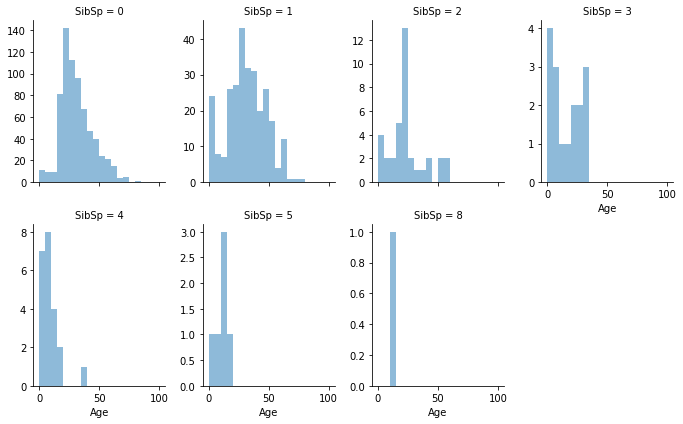

In [58]:
# visualize the correlation between SibSp and Age
grid = sns.FacetGrid(df, col='SibSp', col_wrap=4, size=3.0, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [59]:
# inspect the mean Age for each SibSp
df[['SibSp', 'Age']].groupby(['SibSp']).mean()

,Age
SibSp,
0,30.921766
1,31.058071
2,23.569444
3,16.312500
4,8.772727
5,10.166667
8,14.500000


In [60]:
# inspect the standard deviation of Age for each SibSp
df[['SibSp', 'Age']].groupby(['SibSp']).std()

,Age
SibSp,
0,13.059751
1,15.974482
2,14.910640
3,11.824938
4,8.005545
5,5.192944
8,NaN


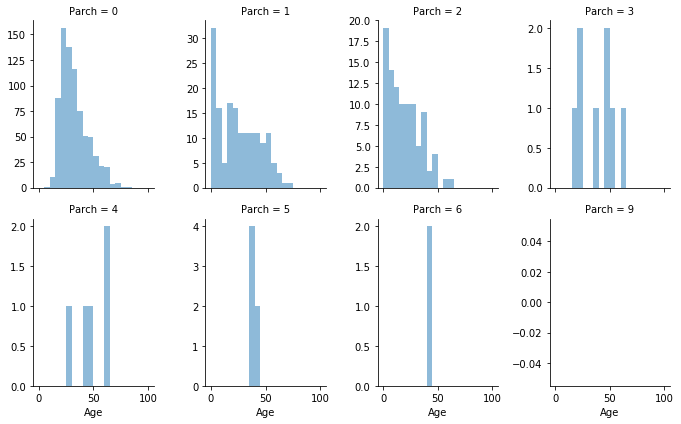

In [61]:
# visualize the correlation between Parch and Age
grid = sns.FacetGrid(df, col='Parch', col_wrap=4, size=3.0, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [62]:
# inspect the mean Age for each Parch
df[['Parch', 'Age']].groupby(['Parch']).mean()

,Age
Parch,
0,31.969401
1,24.965625
2,18.975979
3,38.875000
4,47.600000
5,39.333333
6,41.500000
9,NaN


In [63]:
# inspect the standard deviation of Age for each Parch
df[['Parch', 'Age']].groupby(['Parch']).std()

,Age
Parch,
0,12.422617
1,18.410885
2,14.564066
3,16.295815
4,14.432602
5,1.032796
6,2.121320
9,NaN


The change of Age as a function of Title, Fare-bin, or SibSp is quite significant, so I'll use them to guess the missing values. I use a random forest regressor to do this.

In [64]:
# notice that instead of using Title, we should use its corresponding dummy variables 
df_sub = df[['Age','Master','Miss','Mr','Mrs','Others','Fare-bin','SibSp']]

X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()
X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)


regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)
df.Age.loc[df.Age.isnull()] = y_pred

df.Age.isnull().sum(axis=0) # no more NAN now

/home/dan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

And then we still need to bin the data into different Age intervals, for the same reason as Fare

In [65]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary
age_index = (1,2,3,4,5,6,7) #('baby','child','teenager','young','mid-age','over-50','senior')
df['Age-bin'] = pd.cut(df.Age, bins, labels=age_index).astype(int)

df[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.452381
2,3,0.402597
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


Now we can look at Ticket again

In [66]:
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [67]:
df['Ticket'].value_counts()

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
8      2
9      2
Name: Ticket, dtype: int64

The main categories of Ticket are "1", "2", "3", "P", "S", and "C", so I will combine all the others into "4"

In [68]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [69]:
df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others,Family,Fare-bin,Age-bin
0,22.0,7.2500,0,1,3,0,1,0.0,4,Mr,0,0,1,0,0,2,1,4
1,38.0,71.2833,0,2,1,1,1,1.0,P,Mrs,0,0,0,1,0,2,5,5
2,26.0,7.9250,0,3,3,1,0,1.0,S,Miss,0,1,0,0,0,1,2,4
3,35.0,53.1000,0,4,1,1,1,1.0,1,Mrs,0,0,0,1,0,2,5,5
4,35.0,8.0500,0,5,3,0,0,0.0,3,Mr,0,0,1,0,0,1,2,5


In [70]:
# dummy encoding
df = pd.get_dummies(df,columns=['Ticket'])
print(df.columns.values)

['Age' 'Fare' 'Parch' 'PassengerId' 'Pclass' 'Sex' 'SibSp' 'Survived'
 'Title' 'Master' 'Miss' 'Mr' 'Mrs' 'Others' 'Family' 'Fare-bin' 'Age-bin'
 'Ticket_1' 'Ticket_2' 'Ticket_3' 'Ticket_4' 'Ticket_C' 'Ticket_P'
 'Ticket_S']


In [71]:
df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Master,...,Family,Fare-bin,Age-bin,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_C,Ticket_P,Ticket_S
0,22.0,7.2500,0,1,3,0,1,0.0,Mr,0,...,2,1,4,0,0,0,1,0,0,0
1,38.0,71.2833,0,2,1,1,1,1.0,Mrs,0,...,2,5,5,0,0,0,0,0,1,0
2,26.0,7.9250,0,3,3,1,0,1.0,Miss,0,...,1,2,4,0,0,0,0,0,0,1
3,35.0,53.1000,0,4,1,1,1,1.0,Mrs,0,...,2,5,5,1,0,0,0,0,0,0
4,35.0,8.0500,0,5,3,0,0,0.0,Mr,0,...,1,2,5,0,0,1,0,0,0,0


Now we can drop the features we don't need and split the data into training and test sets.

In [72]:
df = df.drop(labels=['SibSp','Parch','Age','Fare','Title'], axis=1)
y_train = df[0:891]['Survived']
X_train = df[0:891].drop(['Survived','PassengerId'], axis=1)
X_test  = df[891:].drop(['Survived','PassengerId'], axis=1)

In [73]:
df.head()

,PassengerId,Pclass,Sex,Survived,Master,Miss,Mr,Mrs,Others,Family,Fare-bin,Age-bin,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_C,Ticket_P,Ticket_S
0,1,3,0,0.0,0,0,1,0,0,2,1,4,0,0,0,1,0,0,0
1,2,1,1,1.0,0,0,0,1,0,2,5,5,0,0,0,0,0,1,0
2,3,3,1,1.0,0,1,0,0,0,1,2,4,0,0,0,0,0,0,1
3,4,1,1,1.0,0,0,0,1,0,2,5,5,1,0,0,0,0,0,0
4,5,3,0,0.0,0,0,1,0,0,1,2,5,0,0,1,0,0,0,0


In [74]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [75]:
X_train.head()

,Pclass,Sex,Master,Miss,Mr,Mrs,Others,Family,Fare-bin,Age-bin,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_C,Ticket_P,Ticket_S
0,3,0,0,0,1,0,0,2,1,4,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,2,5,5,0,0,0,0,0,1,0
2,3,1,0,1,0,0,0,1,2,4,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,2,5,5,1,0,0,0,0,0,0
4,3,0,0,0,1,0,0,1,2,5,0,0,1,0,0,0,0


In [76]:
X_test.head()

,Pclass,Sex,Master,Miss,Mr,Mrs,Others,Family,Fare-bin,Age-bin,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_C,Ticket_P,Ticket_S
891,3,0,0,0,1,0,0,1,1,5,0,0,1,0,0,0,0
892,3,1,0,0,0,1,0,2,1,5,0,0,1,0,0,0,0
893,2,0,0,0,1,0,0,1,2,6,0,1,0,0,0,0,0
894,3,0,0,0,1,0,0,1,2,4,0,0,1,0,0,0,0
895,3,1,0,0,0,1,0,3,3,4,0,0,1,0,0,0,0


In [80]:
# save pre-procesed data in a csv

X_train.to_csv("X_train.csv", index=False, header=False)
y_train.to_csv("y_train.csv", index=False, header=False)
X_test.to_csv("X_test.csv", index=False, header=False)

In [ ]:
# convert the data to numpy arrays

y_train = df[0:891]['Survived'].values
X_train = df[0:891].drop(['Survived','PassengerId'], axis=1).values
X_test  = df[891:].drop(['Survived','PassengerId'], axis=1).values